# Estrutura de Construção do Keras

In [1]:
from IPython.display import Image

No Keras os modelos são construídos através de camadas, sendo para construi-los vamos de certa forma empilhando umas sobre as outras. A função de perda que escolhemos fornecerá as métricas para as quais usaremos para treinar nosso modelo usando um otimizador.

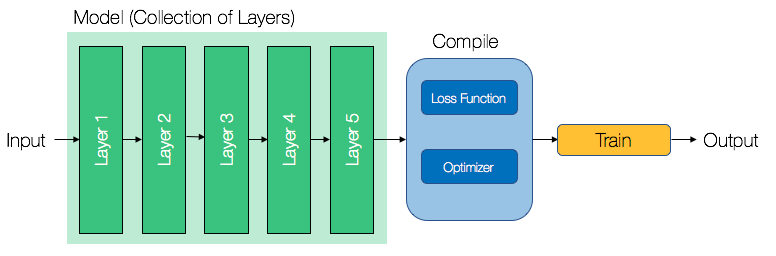

In [2]:
Image('Images/Neural Networks Structure in Keras.png')

## Modelos (Models)

Um modelo na estrutura do Keras são coleções de camadas. Um exemplo é o modelo `Sequential` onde camadas são empilhadas linearmente uma sobre as outras. Isso é muito bom, pois com o Keras não há necessidade de se pensar na matemática subjacente somemente nas dimensões consecutivas sejam compatíveis umas com as outras.

## Camadas (Layers) 

As camadas no Keras são a menor unidade de nossa rede neural. Cada camada que recebe uma entrada executa uma função matemática e a envia para a próxima camada. As camadas principais do Keras incluem camadas densas, camadas de ativação e camadas de eliminação. Existem outras camadas que são mais complexas, incluindo camadas convolucionais e camadas de pool.

Por enquanto, vamos dar uma olhada nas camadas densas, que são de longe o tipo mais comum de camada usada no Keras. Uma camada densa também é conhecida como camada totalmente conectada. Está totalmente conectado porque usa toda a sua entrada (em oposição a um subconjunto da entrada) para a função matemática que implementa.

Uma camada densa implementa a seguinte função:

$$\hat{y} = \sigma(Wx + b)$$

$\hat{y}$ : É a saída da função;

$\sigma$ : É a função de ativação;

$x$ : São os inputs das funções;

$W$ : Pesos atribuídos durante o processo;

$b$ : São os vieses (Biases).

## Compilação (Compile)

Após definir a arquitetura do modelo a ser usado precisamos treiná-lo, para treiná-lo precisamos definir o método de compilação do Keras. Este método pode receber vários processos, porém os mais importantes são o otimizador a ser utilizado (**optimizer**) e a função de perda (**loss function**).

## Função de Perda (loss function)

Uma função de perda tem o seguinte objetivo em um modelo de deep learning, avaliar o quão boas são nossas previsões com base no modelo criado. Cada tipo de problema definira o tipo de função de perda a ser utilizada. No Keras existem diversas funções a serem utilizadas para compilação de um modelo de rede neural porém as mais utilizadas são:

`mean_squared_error`: Se for um problema de regressão;

`binary_crossentropy`: Se for um problema de classificação;

`categorical_crossentropy`: Se for um problema de classificação multiclasse

Caso a função de perda não estiver presente no Keras (o que é muito dificil) ela pode ser implementar e passada ao método de compilação. 

## Otimizador (Optimizer)

Um otimizador é um algoritmo para atualizar os pesos da rede neural no processo de treinamento. Os otimizadores em Keras são baseados no algoritmo de descida de gradiente, que abordamos em uma seção anterior.

Existem vários tipos de otimizadores para redes neurais, cada tipo de rede neural possui um tipo de otimizador que funcionará melhor para o seu tipo de arquitetura em específico, isso deve ser lembrado na hora da escolha para ser utilizado o otimizador adquado. 

# Criando Redes Neurais em Keras

Como exemplo vamos criar uma rede neural de duas camadas para mostrar como funciona a arquitetura do Keras. Primeiro importamos os módulos necessários para realizar a criação da nossa rede neural.

In [3]:
# Importando as bibliotecas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

Após a importação das bibliotecas criamos instanciamos um modelo `Sequential` em seguida vamos adicionando as camadas com o método `.add` e assim definindo as quantidades de unidades e funções de ativação através dos seus respectivos parâmetros. Note que definimos `input_dim=3` isso significa informa o número de features do dataset.

In [4]:
# Instanciando o modelo sequencial
model = Sequential()

# Layer 1
model.add(Dense(units=4, activation='sigmoid', input_dim=3))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

Após a construção do modelo podemos visualizar como o mesmo ficou através do método `.summary`, conforme abaixo.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Agora que criamos nosso modelo com duas camadas vamos compila-lo. Para isto primeiro, definimos o otimizador neste caso o Stochastic Gradient Descent e também definiremos o parâmetro learning rate `lr` como 1. Também definiremos nossa função de perda como `loss='mean_squared_error'`. 

In [6]:
# Definindo o otimizador a ser utilizado
sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)

Por fim para testar esta rede neural vamos criar dois arrays com o numpy, sendo que neste caso, **X** seria as colunas de um dataset utilizada para prever **y**.

In [7]:
# Definindo uma semente aleatória para garatir os mesmos resultados
np.random.seed(42)

# Features
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Target
y = np.array([[0],[1],[1],[0]])

Por fim realizamos o treinamento deste pequena rede neural e em seguida as previsões para os dados de entrada.

In [8]:
# Treina o modelo
model.fit(X, y, epochs=1500, verbose=False)

# Realiza as previsões
model.predict(X)

array([[0.06643105],
       [0.930304  ],
       [0.94169545],
       [0.05505698]], dtype=float32)